## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=17)

In [3]:
# Model without fine-tuning
clf = GradientBoostingClassifier(random_state=17)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.9556


In [4]:
n_estimators = [int(x) for x in np.linspace(10, 100, 10)]
max_depth = [int(x) for x in np.linspace(1, 10, 10)]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=0)
grid_result = grid_search.fit(x_train, y_train)
print("Best Accuracy: %.4f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.9704 using {'max_depth': 1, 'n_estimators': 60}


In [5]:
# Train again using the best hyperparameters
clf_bestparam = GradientBoostingClassifier(
    max_depth=grid_result.best_params_['max_depth'], 
    n_estimators=grid_result.best_params_['n_estimators'], 
    random_state=17)
clf_bestparam.fit(x_train, y_train)
y_pred = clf_bestparam.predict(x_test)
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.9778


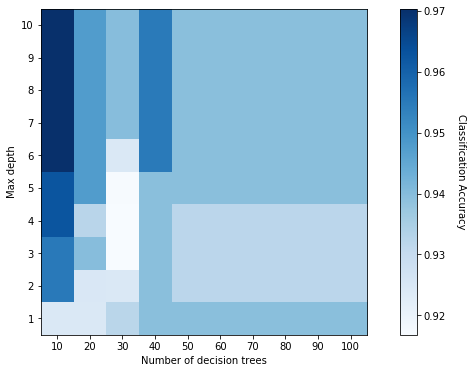

In [6]:
# Reference from 
# https://cambridgecoding.wordpress.com/2016/04/03/scanning-hyperspace-how-to-tune-machine-learning-models/
import matplotlib.pyplot as plt
%matplotlib inline
 
# Fetch scores, reshape into a grid
scores = [x for x in grid_result.cv_results_.get("mean_test_score")]
scores = np.array(scores).reshape(len(n_estimators), len(max_depth))
scores = np.transpose(scores)
 
# Make heatmap from grid search results
plt.figure(figsize=(12, 6))
plt.imshow(scores, interpolation='nearest', origin='higher', cmap='Blues')
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.xlabel('Number of decision trees')
plt.ylabel('Max depth')
plt.colorbar().set_label('Classification Accuracy', rotation=270, labelpad=20)
plt.show()